Name: Stock Market Analysis

Project Type: Deep Learning: Long short-term memory (LSTM)

Analyzing the risk of a stock based on its previous performance history. Predicting future stock prices using LSTM.

In [33]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime

# To scale the data
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Activation


In [ ]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)

company_list = [AAPL, GOOG, MSFT, AMZN] 
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime


# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)

company_list = [AAPL, GOOG, MSFT, AMZN] 
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

Descriptive Statistics about the Data

In [2]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,151.770278,153.907857,149.758532,151.913690,151.548162,8.563237e+07
std,13.035935,12.917801,13.045794,13.005076,12.816346,2.299676e+07
min,126.010002,127.769997,124.169998,125.019997,125.019997,3.519590e+07
25%,142.120003,143.987495,139.974998,142.472496,142.198219,7.019855e+07
50%,149.580002,151.655006,147.825005,150.524994,150.180428,8.075445e+07
75%,162.452499,165.194996,159.774998,163.177498,162.442616,9.390958e+07
max,178.550003,179.610001,176.699997,178.960007,178.154037,1.826020e+08


Information About the Data

In [3]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2022-02-03 00:00:00-05:00 to 2023-02-03 00:00:00-05:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          252 non-null    float64
 1   High          252 non-null    float64
 2   Low           252 non-null    float64
 3   Close         252 non-null    float64
 4   Adj Close     252 non-null    float64
 5   Volume        252 non-null    int64  
 6   company_name  252 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


Closing Price

The closing price is the last price at which the stock is traded during the regular trading day. 
A stock’s closing price is the standard benchmark used by investors to track its performance over time.

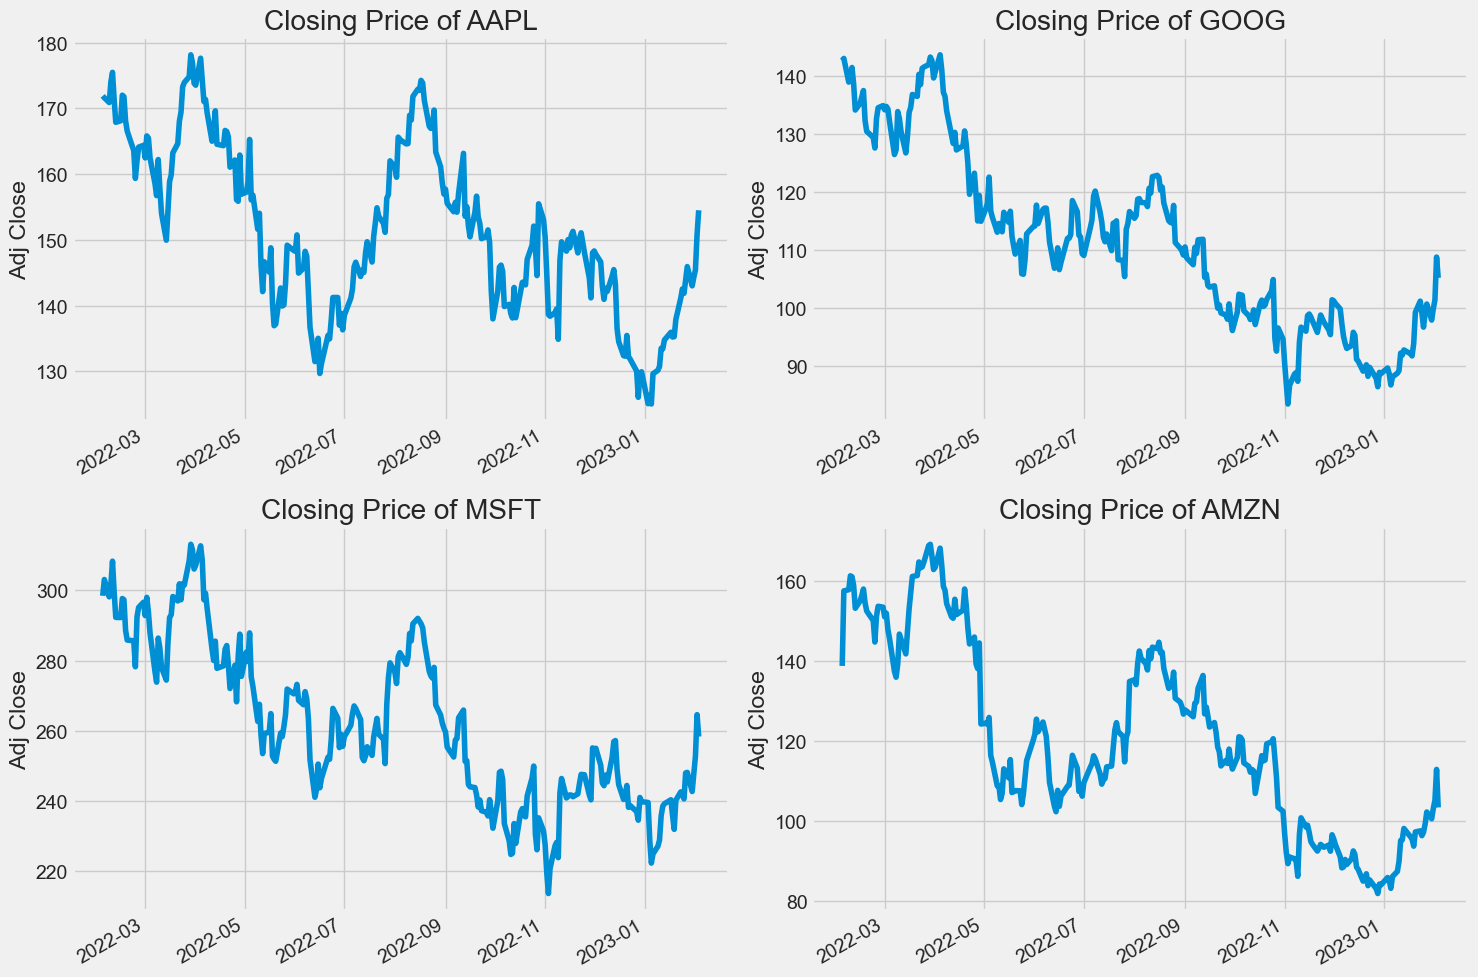

In [4]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

Volume of Sales

Volume is the amount of an asset or security that changes hands over some period of time, often over the course of a day.

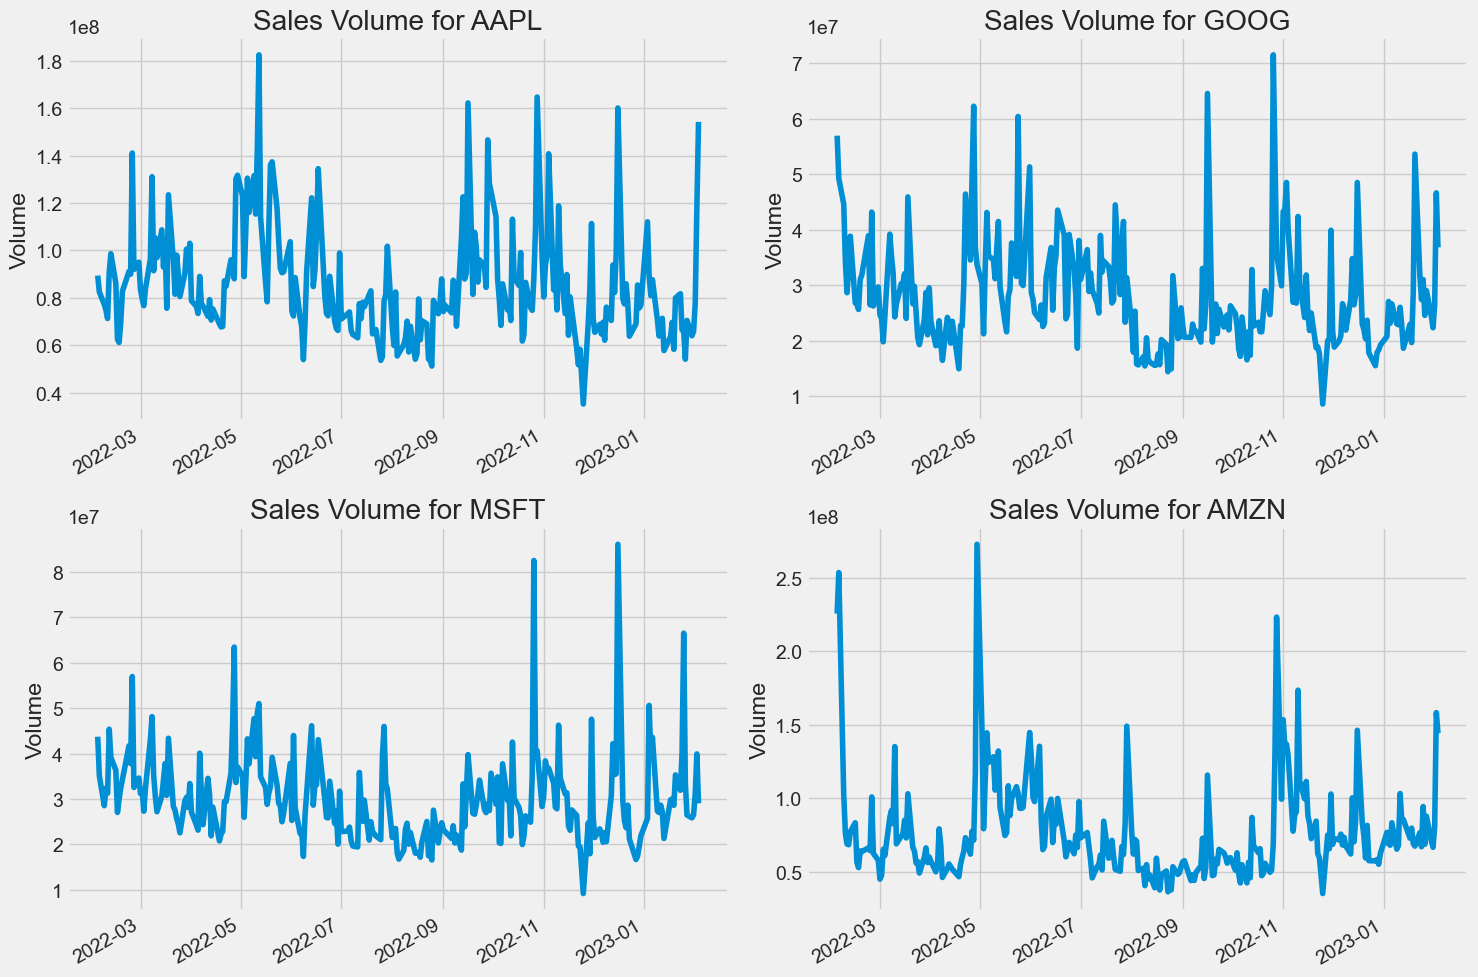

In [5]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

Compute the Moving Average (MA),  simple technical analysis tool that smooths out price data by creating a constantly updated average price.

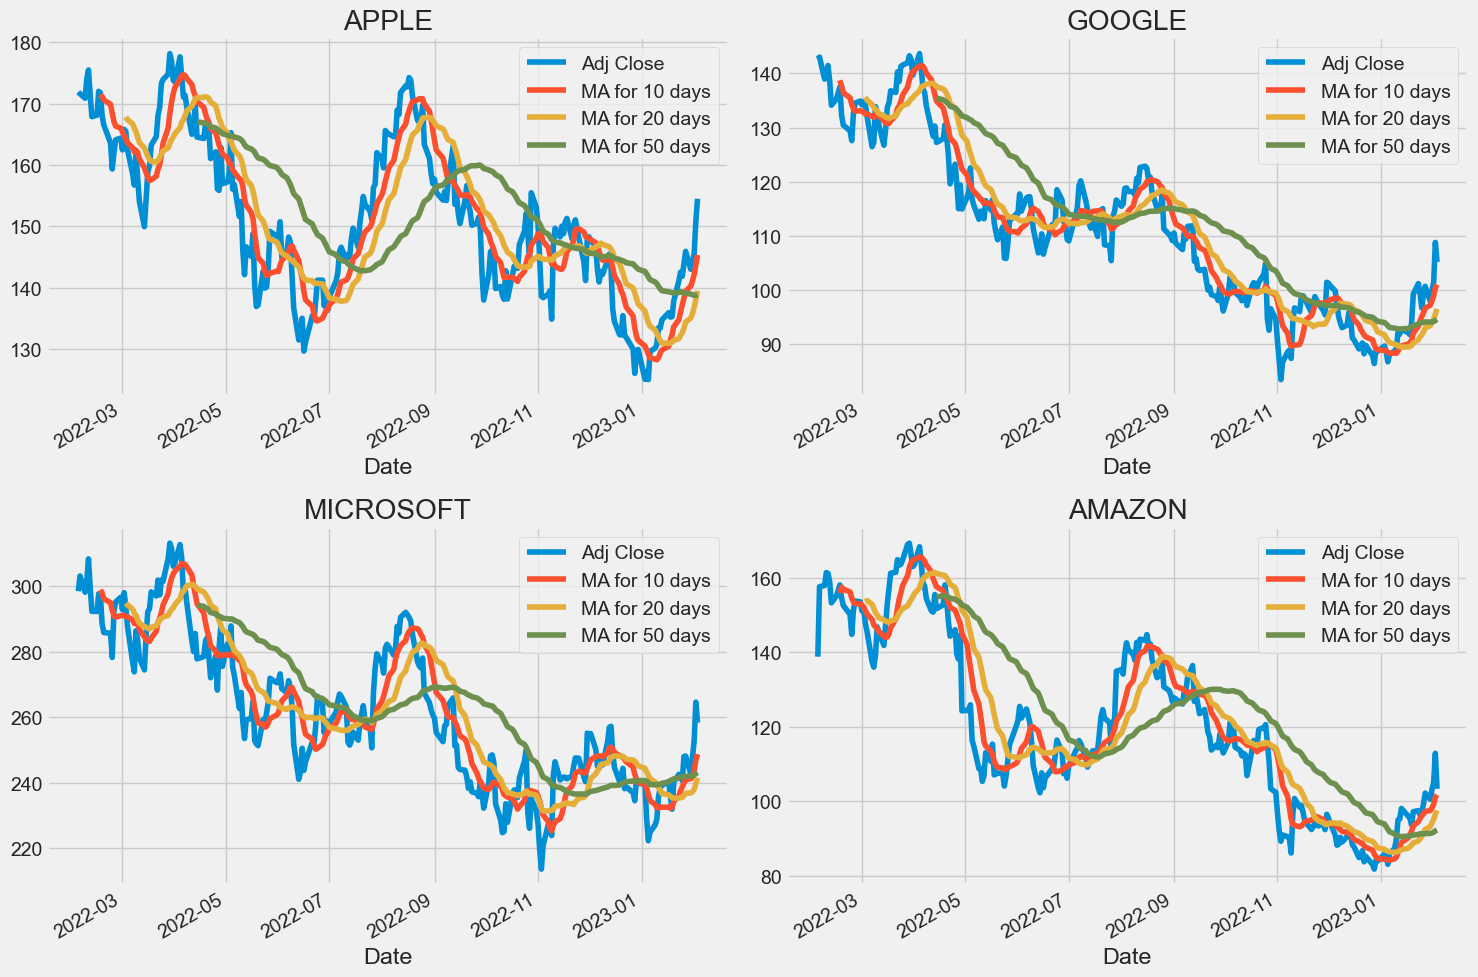

In [6]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

Analize the risk of the stock to check what was the daily return of the stock on average

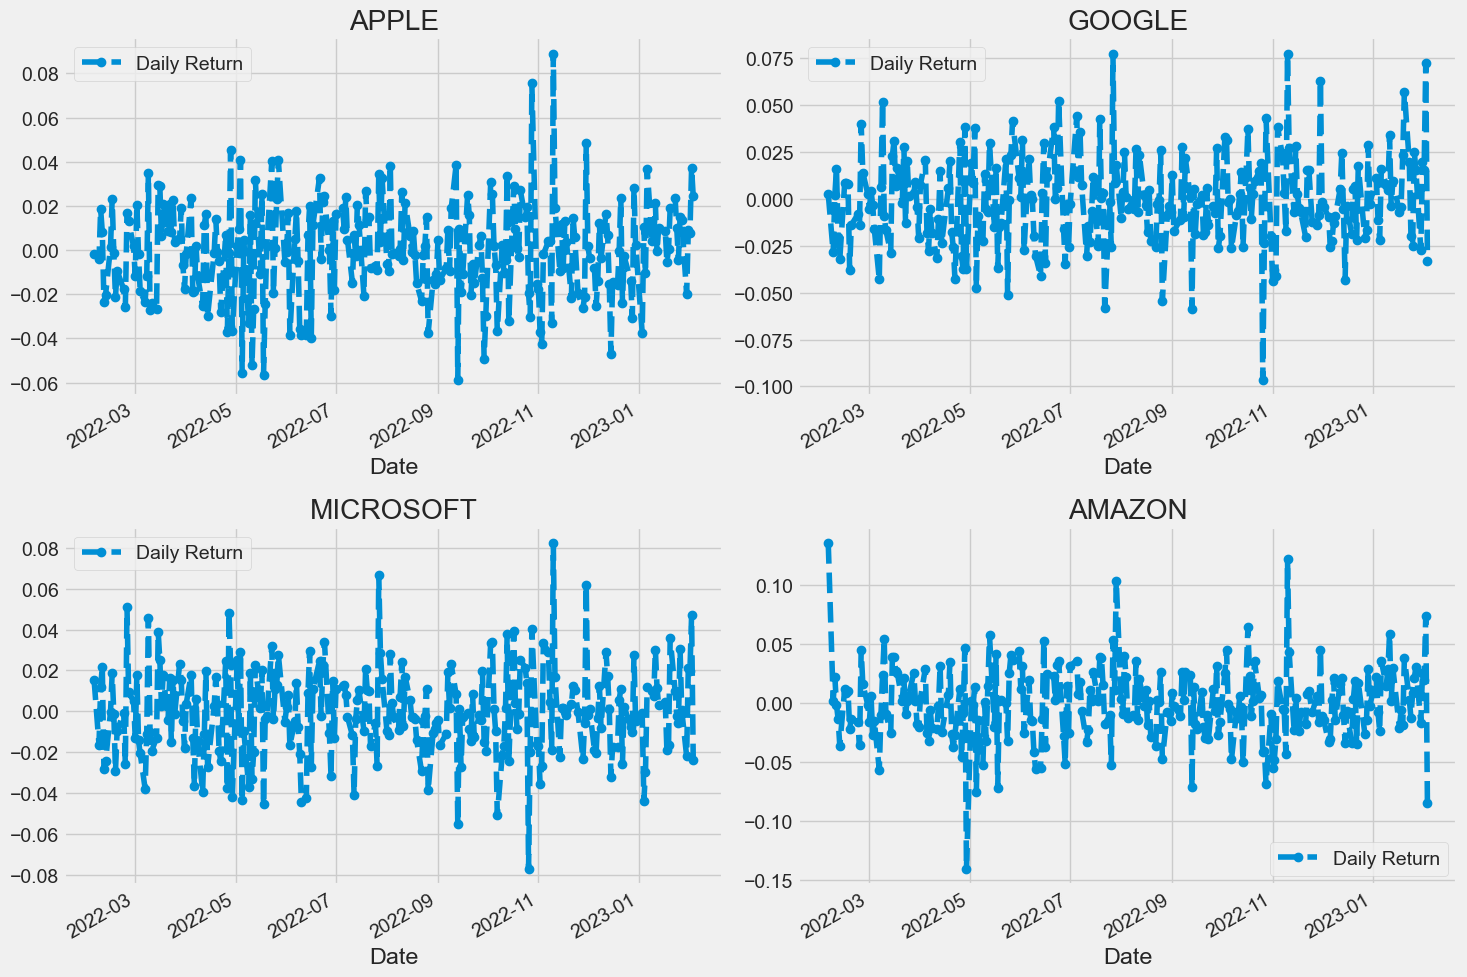

In [7]:
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

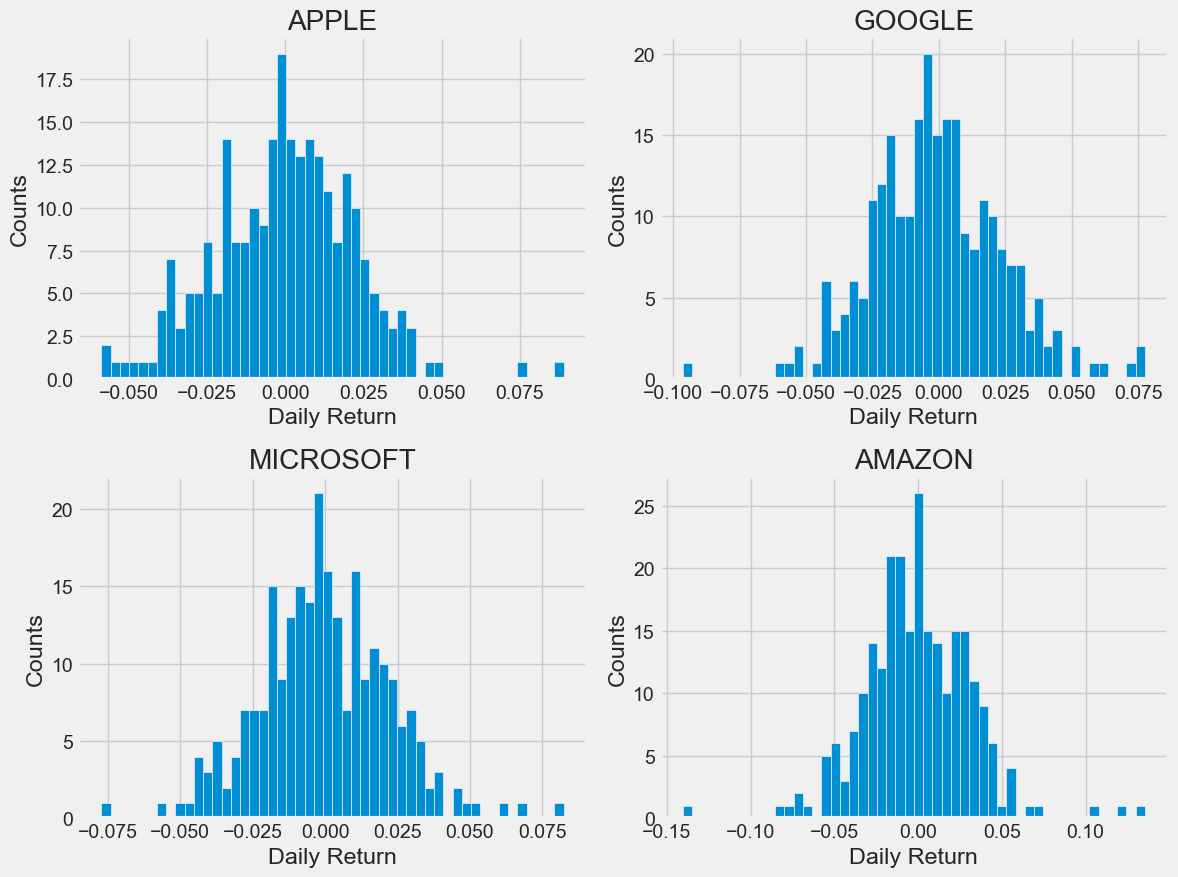

In [8]:
# Compute the average daily return as an histogram chart
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

Obtain correlation

In [9]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%***********************]  4 of 4 completed


,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-02-03 00:00:00-05:00,NaN,NaN,NaN,NaN
2022-02-04 00:00:00-05:00,-0.001679,0.135359,0.002562,0.015569
2022-02-07 00:00:00-05:00,-0.004235,0.001878,-0.028514,-0.016310
2022-02-08 00:00:00-05:00,0.018467,0.022022,0.001979,0.011995
2022-02-09 00:00:00-05:00,0.008294,-0.001388,0.016090,0.021835


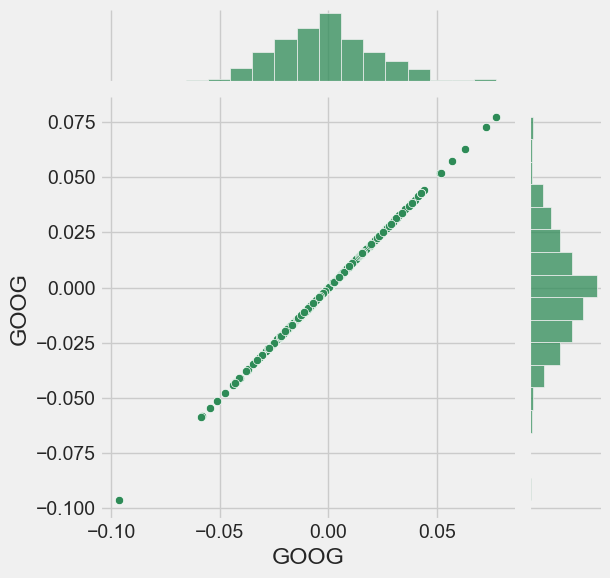

In [10]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

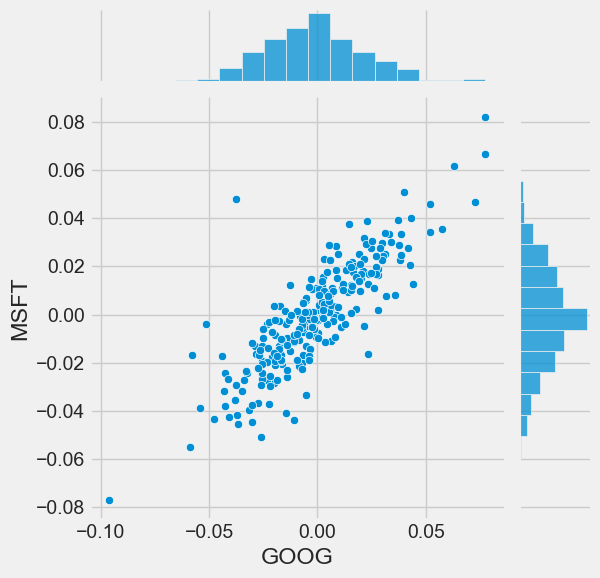

In [11]:
# Use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')

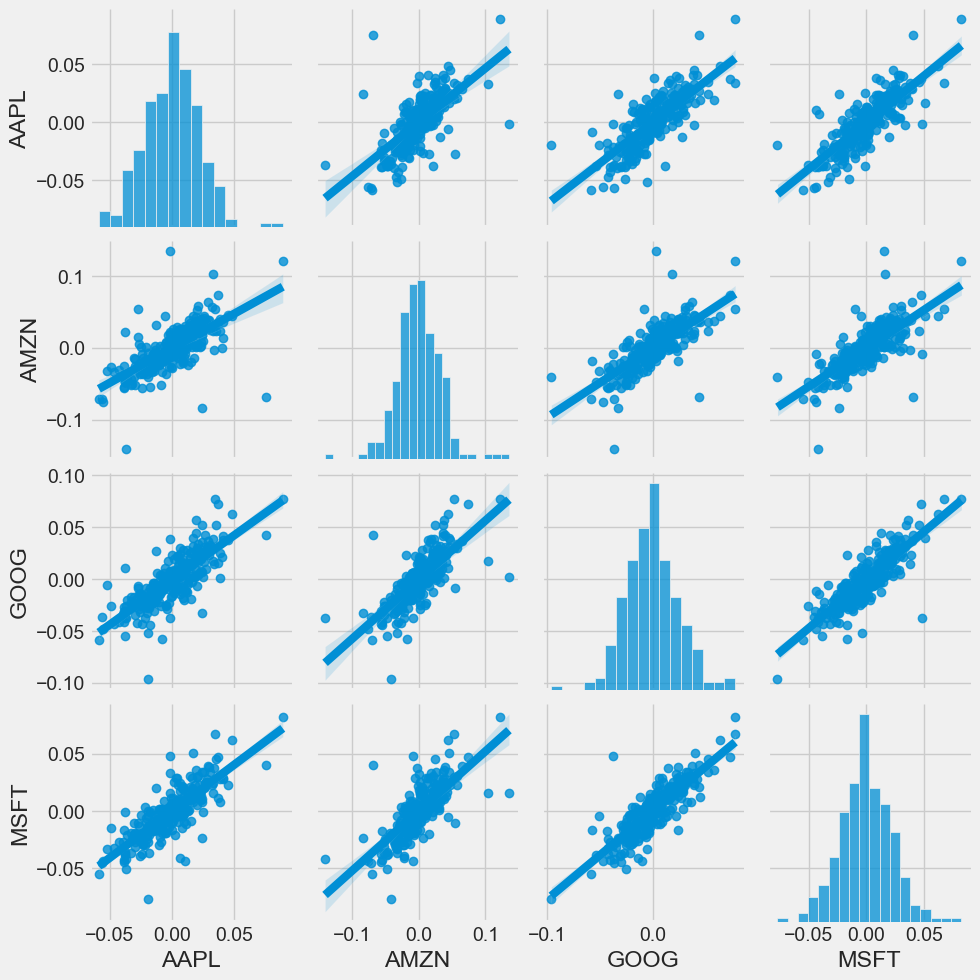

In [13]:
# Compare all of the tech companies in one plot
sns.pairplot(tech_rets, kind='reg')
# There is a great correlation between Google and Amazon

Correlation plot

Text(0.5, 1.0, 'Correlation of stock closing price')

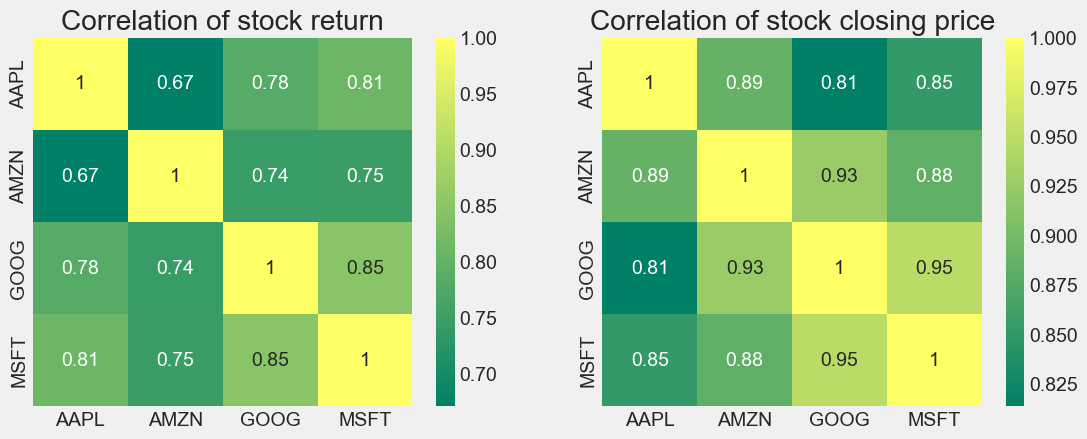

In [14]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

What about risk?

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

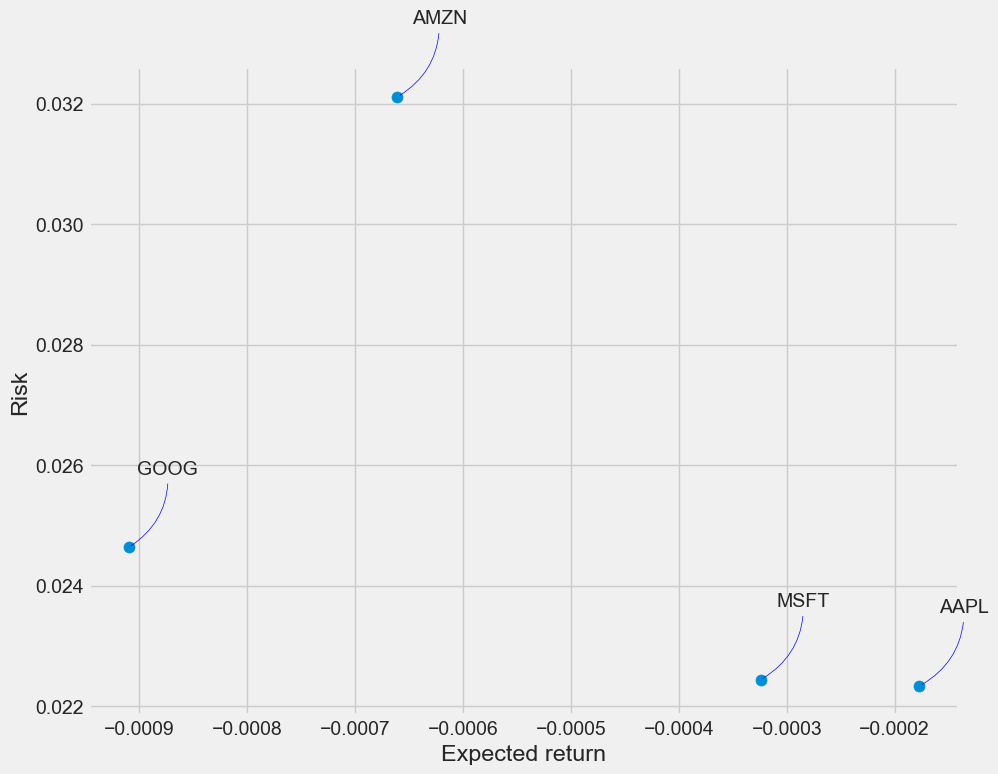

In [15]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

Predictin closing price stock price for a tech company

In [83]:
def Create_model(X_train, y_train): 
    # NN Arquitecture
    model = Sequential()
    model.add(keras.layers.InputLayer(input_shape=(X_train.shape[1], 1)))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(25, activation='relu'))
    model.add(Dense(1, activation='softmax'))
    
    # Compile model and train
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=120, batch_size=30, verbose=0)
    
    return model

def prep_test_data(scaled_data, training_data_len, dataset, model, scaler):
    # Create the testing data set
    # Create a new array containing scaled values from index 1543 to 2002 
    test_data = scaled_data[training_data_len - 60: , :]
    # Create the data sets x_test and y_test
    x_test = []
    y_test = dataset[training_data_len:, :]
    for i in range(60, len(test_data)):
        x_test.append(test_data[i-60:i, 0])
        
    # Convert the data to a numpy array
    x_test = np.array(x_test)

    # Reshape the data
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

    # Get the models predicted price values 
    predictions = model.predict(x_test)
    
    #print(predictions.shape)
    predictions = predictions.reshape(-1, 1)
    #print(predictions.shape)
    
    # Invert the predicted values scale
    predictions = scaler.inverse_transform(predictions)

    # Get the root mean squared error (RMSE)
    #rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
    #print('RMSE: ', rmse)
    
    return x_test, y_test, predictions
    

def CPS_pred(company = 'AAPL'):
    # Get the stock quote
    df = pdr.get_data_yahoo(company, start='2012-01-01', end=datetime.now())
    
    # Plot the Close Price History of the company
    plt.figure(figsize=(16,6))
    plt.title('Close Price History')
    plt.plot(df['Close'])
    plt.xlabel('Date', fontsize=18)
    plt.ylabel('Close Price USD ($)', fontsize=18)
    plt.show()
    
    # Create a new dataframe with only the 'Close column 
    data = df.filter(['Close'])
    # Convert the dataframe to a numpy array
    dataset = data.values
    # Get the number of rows to train the model on
    training_data_len = int(np.ceil( len(dataset) * .95 ))

    scaler = MinMaxScaler(feature_range=(0,1))
    scaled_data = scaler.fit_transform(dataset)
    
    # Create the training data set 
    # Create the scaled training data set
    train_data = scaled_data[0:int(training_data_len), :]
    # Split the data into x_train and y_train data sets
    X_train = []
    y_train = []

    for i in range(60, len(train_data)):
        X_train.append(train_data[i-60:i, 0])
        y_train.append(train_data[i, 0])
        # if i<= 61:
        #     print(X_train)
        #     print(y_train)
        #     print()
            
    # Convert the X_train and y_train to numpy arrays 
    X_train, y_train = np.array(X_train), np.array(y_train)

    # Reshape the data
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
    
    model = Create_model(X_train, y_train)
    print('NN Trained')
    
    predictions = prep_test_data(scaled_data, training_data_len, dataset, model, scaler)
    
    return predictions, training_data_len, data

[*********************100%***********************]  1 of 1 completed


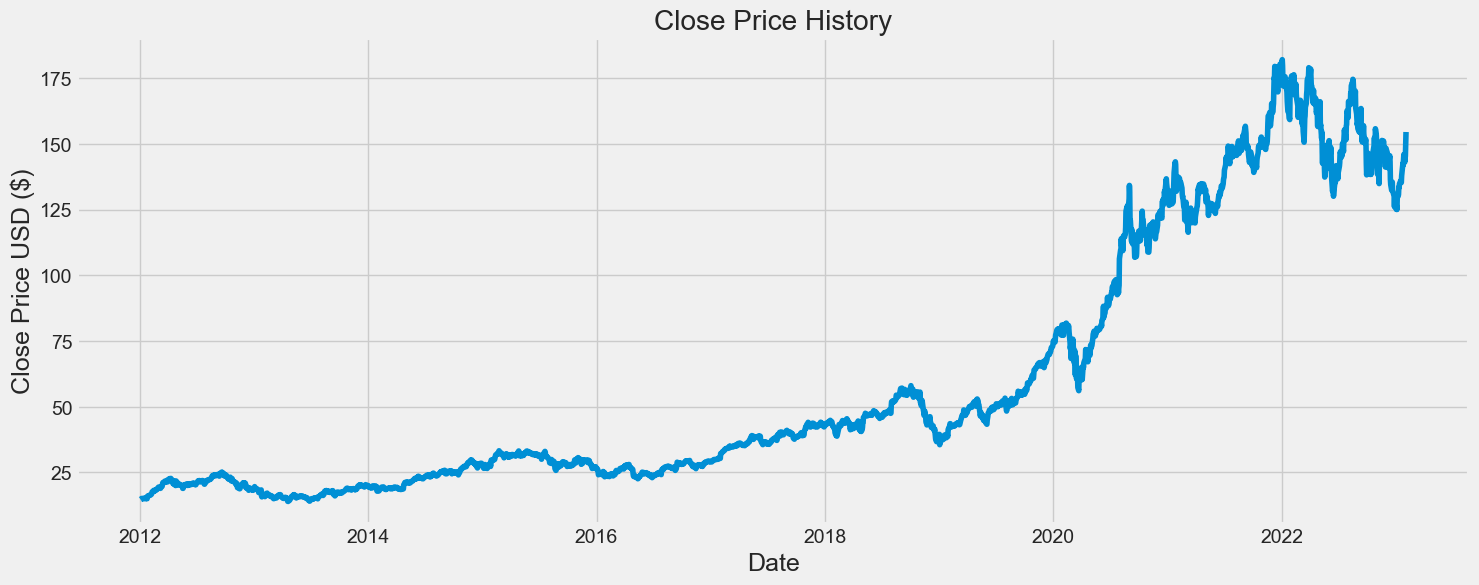

NN Trained
5/5 [==============================] - 0s 3ms/step


In [84]:
predictions, training_data_len, data = CPS_pred('AAPL')

In [85]:
pred = np.array(predictions[2])
# reshape array to (139,60,1)
pred = np.array(predictions[2]).reshape(139,60,1)
pred.shape

(139, 60, 1)

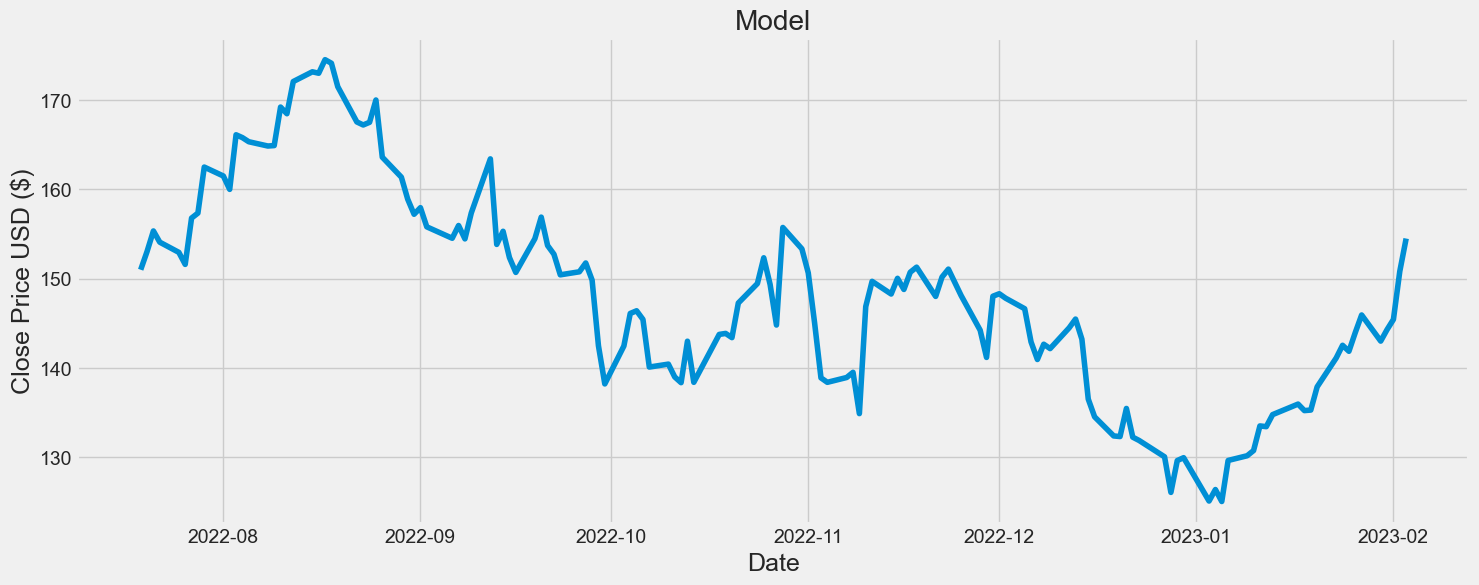

values: (139, 60, 1)


In [115]:
# plot the predictions and the actual values
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(data[training_data_len:])
#plt.plot(pred)
plt.show()

print('values:', pred.shape)


C:\Users\jmfig\AppData\Local\Temp\ipykernel_16756\1489283577.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = pred


ValueError: could not broadcast input array from shape (60,1) into shape (1,139)

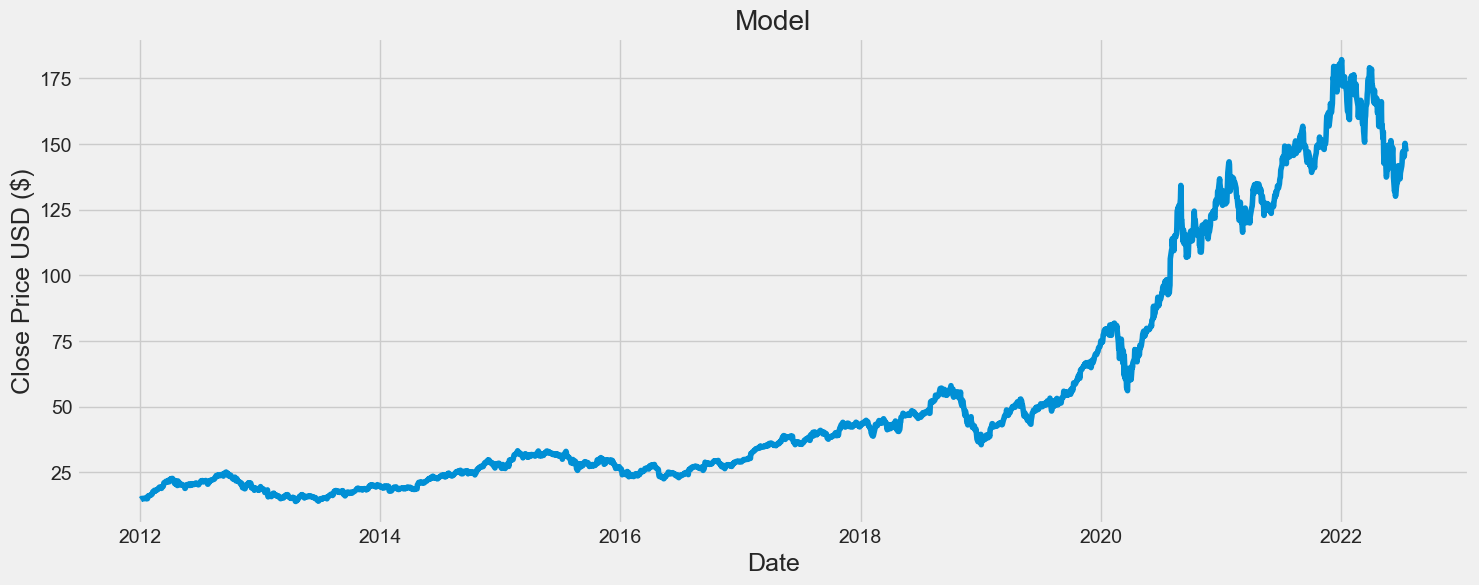

In [79]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = pred
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()